In [2]:
# 課題1
class UnitConverter:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def transform(self, x):
        print(self.a * x + self.b)
    
    def inverse_transform(self, y):
        print((y - self.b) / self.a)
    
CF_converter = UnitConverter(1.8, 32)
CF_converter.transform(10)
CF_converter.inverse_transform(300)

50.0
148.88888888888889


In [4]:
# 課題2
import math

class Circle:
    def __init__(self, r):
        self.radius = r
    
    def calc_area(self):
        print(self.radius**2 * math.pi)
        
    def calc_length(self):
        print(2 * self.radius * math.pi)
        

circle_a = Circle(3)
circle_a.calc_area()
circle_a.calc_length()

28.274333882308138
18.84955592153876


In [9]:
# 課題3
def quadratic_equation(a, b, c):
    discriminant = b**2 - 4*a*c

    if discriminant >= 0:
        x1 = (-b + math.sqrt(discriminant)) / (2*a)
        x2 = (-b - math.sqrt(discriminant)) / (2*a)
        if discriminant == 0:
            return x1
        return x1, x2
    else:
        print("実数解がありません。")
        raise ValueError
    
a = float(input("aを入力してください: "))
b = float(input("aを入力してください: "))
c = float(input("aを入力してください: "))

quadratic_equation(a, b, c)

(3.0, 2.0)

In [11]:
# 課題4
from typing import List

class VectorOperations:
    def __init__(self, a: List[float], b: List[float]):
        self.a, self.b = a, b
    
    def dot_product(self):
        return self.a[0]*self.b[0] + self.a[1]*self.b[1] + self.a[2]*self.b[2]
    
    def cross_product(self):
        return (self.a[1]*self.b[2] - self.a[2]*self.b[1], self.a[2]*self.b[0] - self.a[0]*self.b[2], self.a[0]*self.b[1] - self.a[1]*self.b[0])
    
   
a = [float(input("ベクトルaのx成分を入力: ")),
     float(input("ベクトルaのy成分を入力: ")),
     float(input("ベクトルaのz成分を入力: "))]

b = [float(input("ベクトルbのx成分を入力: ")),
     float(input("ベクトルbのy成分を入力: ")),
     float(input("ベクトルbのz成分を入力: "))]
 
vector_ops = VectorOperations(a, b)
print(vector_ops.dot_product())
print(vector_ops.cross_product())

32.0
(-3.0, 6.0, -3.0)


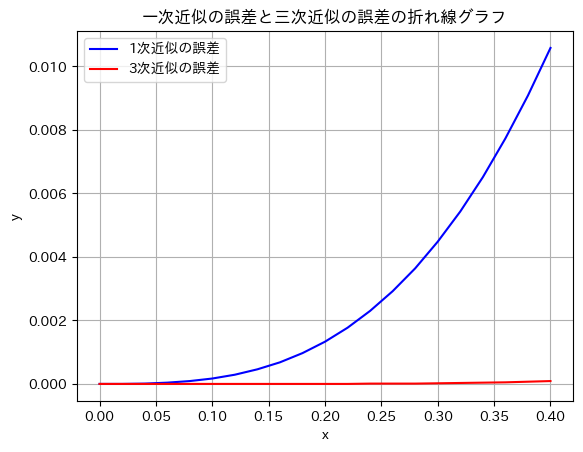

In [21]:
# 課題5
from decimal import Decimal
import math
import matplotlib.pyplot as plt
import japanize_matplotlib

class MaclaurinSeries:
    def __init__(self, x: Decimal):
        self.x = x
        
    # sin
    def sin_exact(self) -> Decimal:
        return Decimal(math.sin(float(self.x)))
    
    def sin_approx_1st(self) -> Decimal:
        return self.x
    
    def sin_approx_3rd(self) -> Decimal:
        return self.x - (self.x**3 / Decimal(6))
    
    def error_sin_1st(self) -> Decimal:
        return round(abs(self.sin_exact() - self.sin_approx_1st()), 5)
    
    def error_sin_3rd(self) -> Decimal:
        return round(abs(self.sin_exact() - self.sin_approx_3rd()), 5)
    
    # exponential
    def ex_exact(self) -> Decimal:
        return Decimal(math.exp(float(self.x)))
    
    def ex_approx_1st(self) -> Decimal:
        return 1 + self.x
    
    def ex_approx_2nd(self) -> Decimal:
        return 1 + self.x + (self.x**2 / Decimal(2))
    
    def ex_approx_3rd(self) -> Decimal:
        return 1 + self.x + (self.x**2 / Decimal(2)) + (self.x**3 / Decimal(6))
    
    def error_ex_1st(self) -> Decimal:
        return round(abs(self.ex_exact() - self.ex_approx_1st()), 5)
    
    def error_ex_2nd(self) -> Decimal:
        return round(abs(self.ex_exact() - self.ex_approx_2nd()), 5)
    
    def error_ex_3rd(self) -> Decimal:
        return round(abs(self.ex_exact() - self.ex_approx_3rd()), 5)
    
    
x_values = []
y_error_values_1st = []
y_error_values_3rd = []

for x in range(0, 41, 2):
    x_decimal = Decimal(x*0.01)
    maclaurin_series = MaclaurinSeries(x_decimal)
    
    x_values.append(x_decimal)
    y_error_values_1st.append(maclaurin_series.error_sin_1st())
    y_error_values_3rd.append(maclaurin_series.error_sin_3rd())

plt.plot(x_values, y_error_values_1st, color="blue", label="1次近似の誤差")
plt.plot(x_values, y_error_values_3rd, color="red", label="3次近似の誤差")

plt.xlabel("x")
plt.ylabel("y")
plt.title("一次近似の誤差と三次近似の誤差の折れ線グラフ")

plt.legend()
plt.grid()
plt.show()

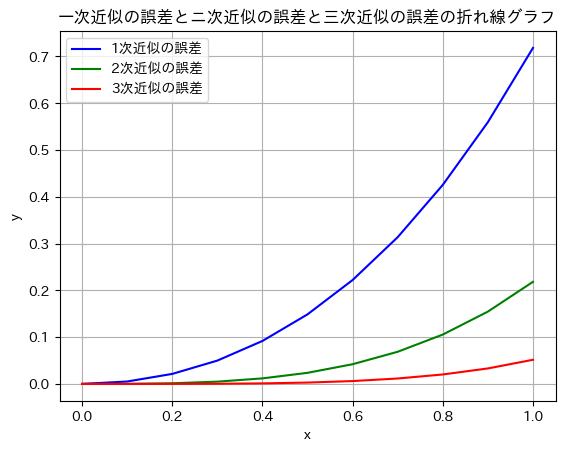

In [22]:
# 課題6
x_values = []
y_error_values_1st = []
y_error_values_2nd = []
y_error_values_3rd = []

for x in range(0, 11, 1):
    x_decimal = Decimal(x*0.1)
    maclaurin_series = MaclaurinSeries(x_decimal)
    
    x_values.append(x_decimal)
    y_error_values_1st.append(maclaurin_series.error_ex_1st())
    y_error_values_2nd.append(maclaurin_series.error_ex_2nd())
    y_error_values_3rd.append(maclaurin_series.error_ex_3rd())

plt.plot(x_values, y_error_values_1st, color="blue", label="1次近似の誤差")
plt.plot(x_values, y_error_values_2nd, color="green", label="2次近似の誤差")
plt.plot(x_values, y_error_values_3rd, color="red", label="3次近似の誤差")

plt.xlabel("x")
plt.ylabel("y")
plt.title("一次近似の誤差とニ次近似の誤差と三次近似の誤差の折れ線グラフ")

plt.legend()
plt.grid()
plt.show()

In [25]:
# 課題7
values = []

def recursive(n):
    if n == 0:
        return 2
    else:
        result = recursive(n-1)**2 + 1
        values.append(result)
        return result

recursive(8)
print(values)

[5, 26, 677, 458330, 210066388901, 44127887745906175987802, 1947270476915296449559703445493848930452791205, 3791862310265926082868235028027893277370233152247388584761734150717768254410341175325352026]


In [29]:
# 課題8
values = []

def fibonacci(n, memo={0: 0, 1: 1}):
    if n in memo:
        return memo[n]
    memo[n] = fibonacci(n-1, memo) + fibonacci(n-2, memo)
    return memo[n]


for i in range(2, 11):
    values.append(fibonacci(i))

print(values)

[1, 2, 3, 5, 8, 13, 21, 34, 55]
